In [58]:
%matplotlib inline

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [60]:
df = pd.read_csv('heartdisease_data.csv', header = None, na_values = '?') 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

The following columns are Nominal Categorical:

    Sex = Gender: 1 = Male, 0 = Female
    CP = Chest pain
    fbs = Sugar Level, if sugar level>120mg/dl: 1 = yes, 0 = no
    restecg = Resting ECG level: 0 = Normal, 1 = ST-T wave abnormal, 2 = Left Ventrical Hypertrophy
    slope = Slope of ECG during exercise: 1 = Upsloping, 2 = Flat, 3 = Downsloping
    thal = defect: 3 = Normal, 6 = Fixed defect, 7 = Reversivble defect
    exang = exercise induced angina : 1 = yes; 0 = no 

In [61]:
df.columns = ['age', 'fbs', 'cp', 'trestbps', 'chol', 'sex','restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']
df.head()

,age,fbs,cp,trestbps,chol,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [62]:
df.shape

(200, 14)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   fbs       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   sex       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [64]:
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps     56
chol          7
sex           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

columns: ca and thal contain more than 75% null values, so it will be logical to drop them, unless null value represents something significant

In [65]:
for i in df.columns:
    print(i,df[i].unique())

age [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
fbs [1 0]
cp [4 3 2 1]
trestbps [140. 130. 132. 142. 110. 120. 150. 180. 160. 126.  nan 128. 170. 152.
 116. 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135.
 158. 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]
chol [260. 209. 218. 228. 213.   0. 236. 267. 166. 220. 177. 186. 100. 171.
 230. 281. 203. 277. 233. 240. 153. 224. 316. 311. 270. 217. 214. 252.
 339. 216. 276. 458. 241. 384. 297. 248. 308. 208. 227. 210. 245. 225.
 198. 195. 161. 258. 235. 305. 223. 282. 349.  nan 160. 312. 283. 142.
 211. 306. 222. 202. 197. 204. 274. 192. 298. 272. 200. 261. 181. 221.
 175. 219. 310. 232. 273. 182. 292. 289. 193. 170. 369. 173. 271. 244.
 285. 243. 237. 165. 287. 256. 264. 226. 207. 284. 337. 254. 300. 333.
 139. 385.]
sex [ 0.  1. nan]
restecg [1 2 0]
thalach [112. 127. 140. 149.  99. 120. 105. 141. 157. 117.  nan 148.  86.  84.
 125. 11

Column ca can be dropped as it only contains 0 and NaN

In [66]:
df.drop('ca', axis = 1, inplace = True)

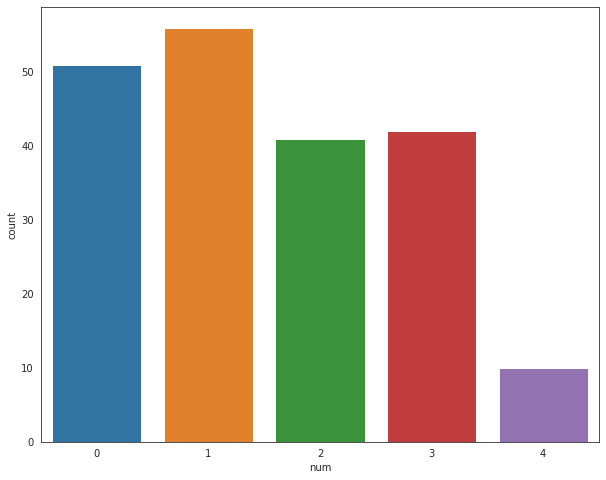

In [67]:
plt.figure().set_size_inches(10,8)
sns.countplot(df["num"])

According to the source, 0 means no disease, and 1,2,3,4 means a form of Heart Disease.
The classes seem to be equally distributed except for 'num' 4

It will be also beneficial to predict only two classes: 0 for no heart disease, 1 for Some form of heart disease

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0601d7430>,
      dtype=object)

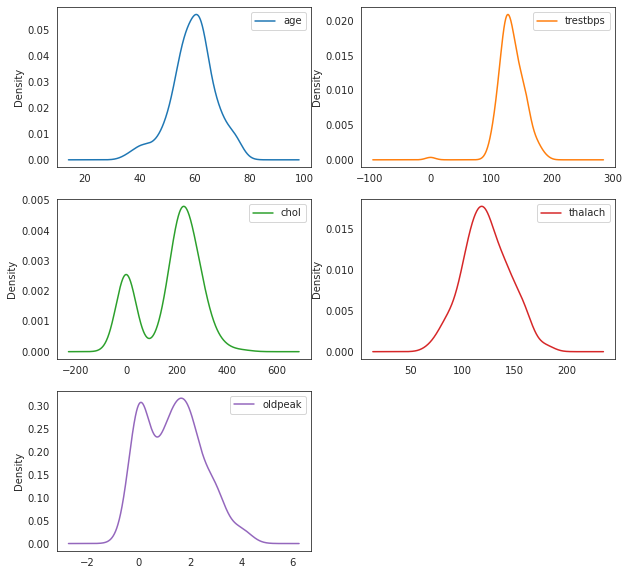

In [68]:
df[['age','trestbps','chol','thalach', 'oldpeak']].plot(kind = 'kde',
                                    subplots = True, sharex = False, layout = (3,2), figsize = (10,10))

In [69]:
def heart(row):
    if row["num"]>0:
        row["num1"] = 1
    else:
        row["num1"] = 0
    return row
df = df.apply(heart,axis = 1)

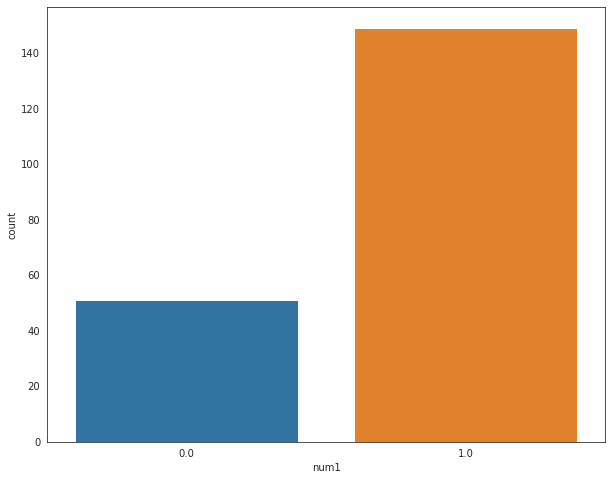

In [70]:
plt.figure().set_size_inches(10,8)
sns.countplot(df["num1"])

Normalization is required, most of the graphs have more than one peak

In [71]:
def cnt(column):
    plt.figure().set_size_inches(8,8)
    sns.countplot(x = column, hue = "num1", data = df, palette = 'viridis')

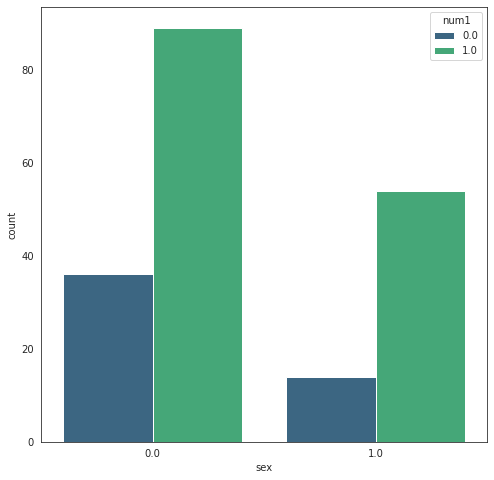

In [72]:
cnt("sex")

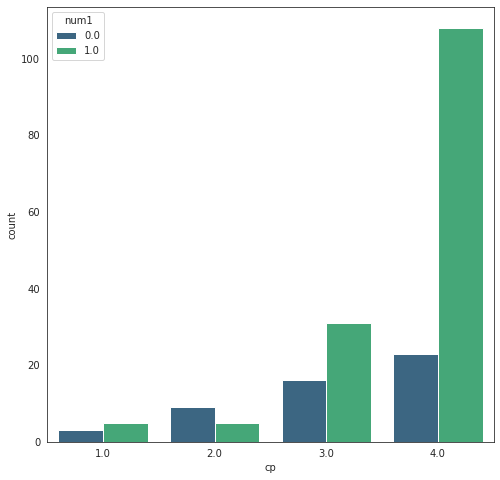

In [73]:
cnt("cp")

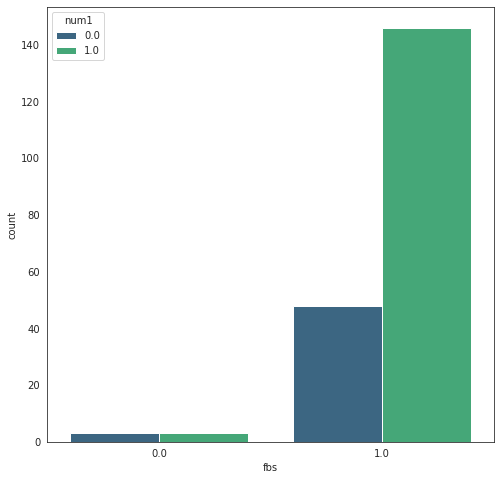

In [74]:
cnt('fbs')

Might be that fbs and sex has gotten exchanged.

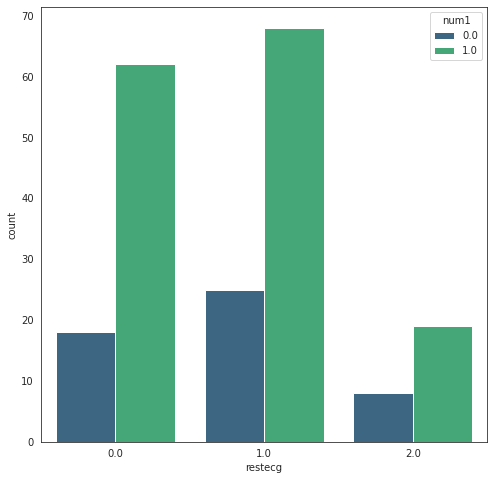

In [75]:
cnt('restecg')

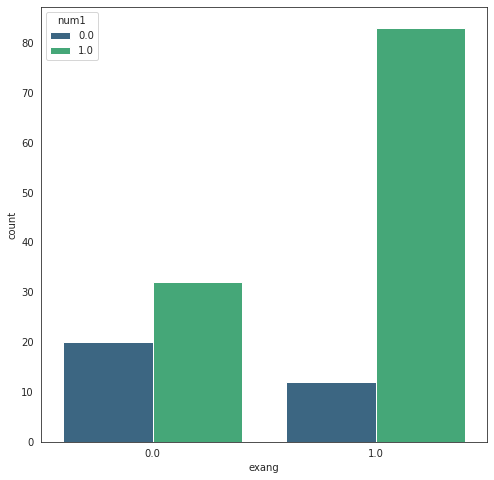

In [76]:
cnt('exang')

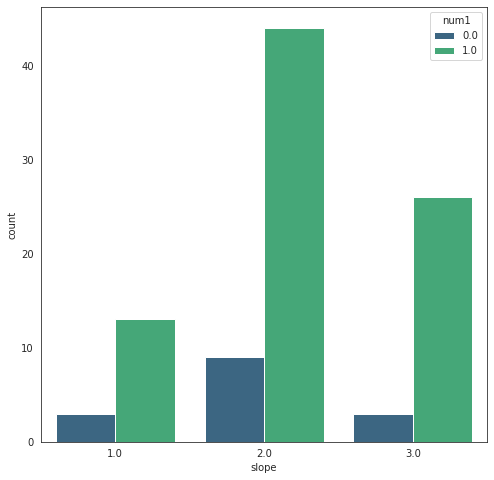

In [77]:
cnt('slope')

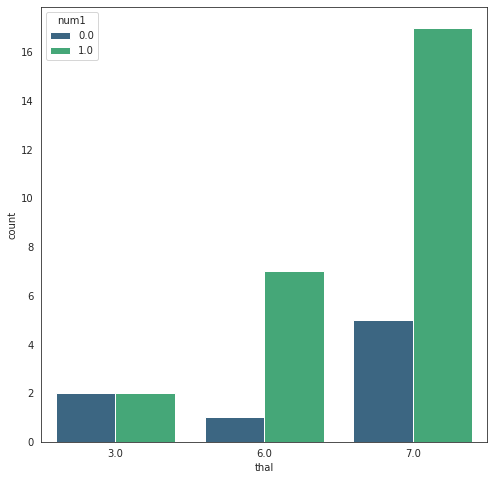

In [78]:
cnt('thal')

<Figure size 720x720 with 0 Axes>

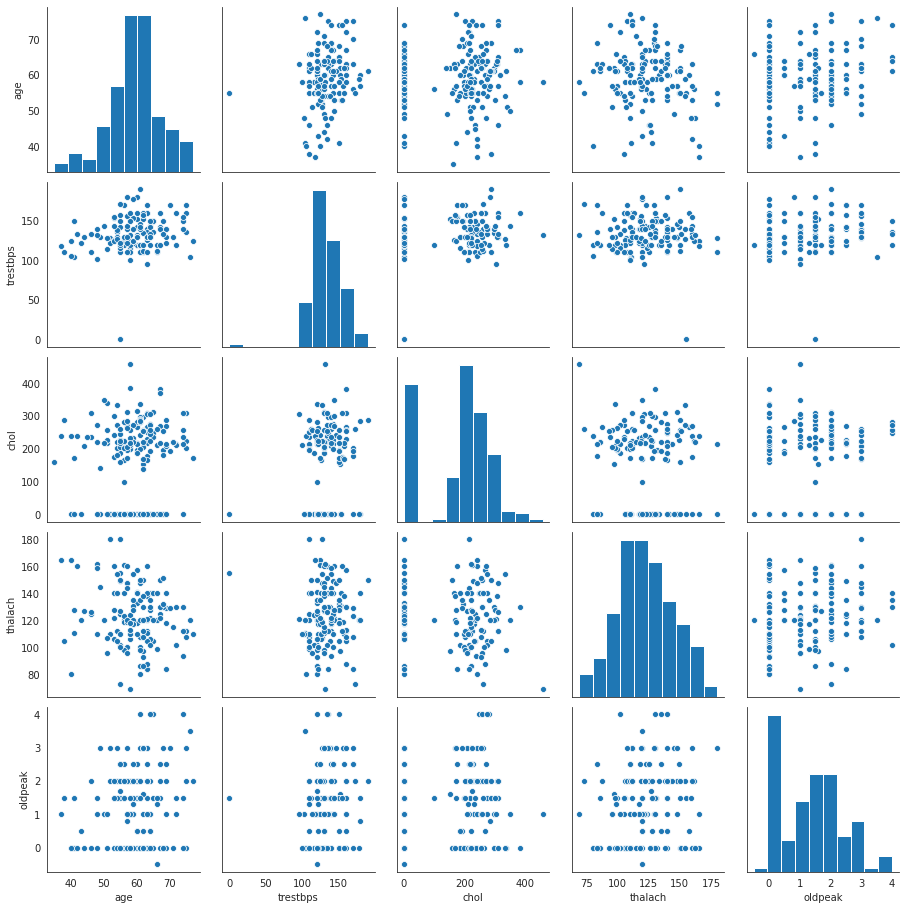

In [79]:
num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
plt.figure().set_size_inches(10,10)
sns.pairplot(num)

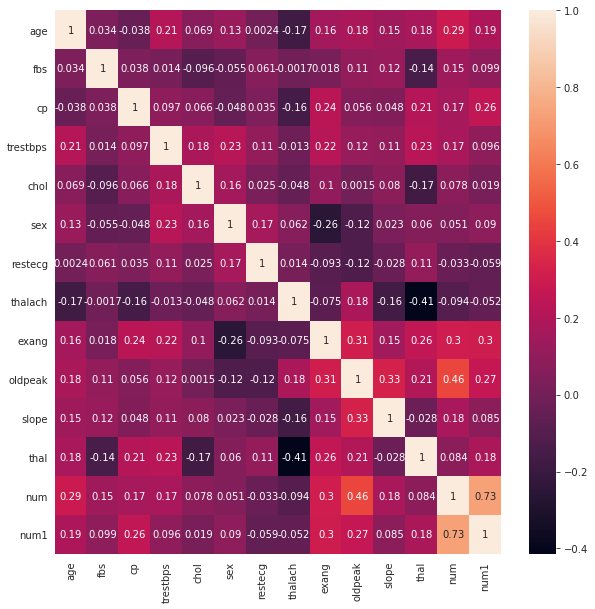

In [80]:
plt.figure().set_size_inches(10,10)
sns.heatmap(df.corr(), annot = True)

The features seem to be independant of each other, and have low correlation amongst themselves

In [81]:
def scatter(column1, column2):
    plt.figure().set_size_inches(8,8)
    sns.scatterplot(x = column1, y = column2, hue = 'num1', data = df, palette = 'viridis')

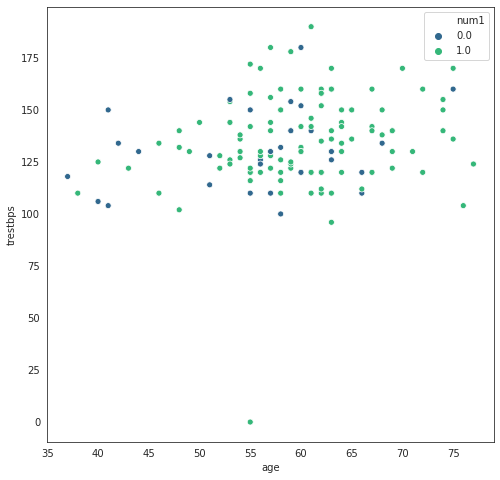

In [82]:
scatter('age','trestbps') 

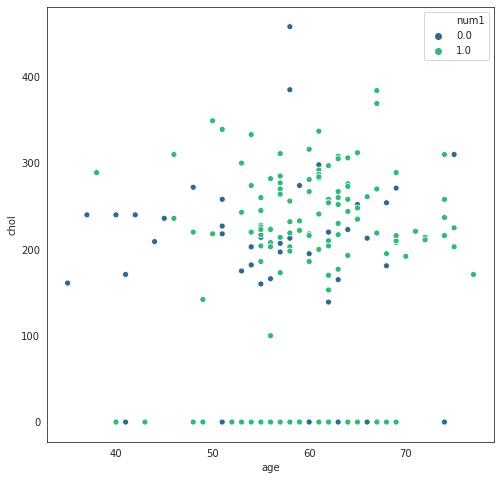

In [83]:
scatter("age", "chol")

There seem to be small correlaion between age VS trestbps and age VS chol.


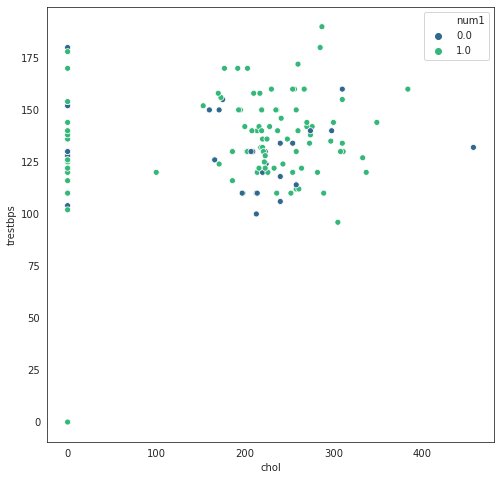

In [84]:
scatter("chol", "trestbps")

Looking at the graphs, baring a few outliers, the patients having no heart disease have lower trestbps and chol levels, while higher trestbps and chol is associated with some kind of heart disease

In [85]:
df['thalach'].isnull().sum()

53

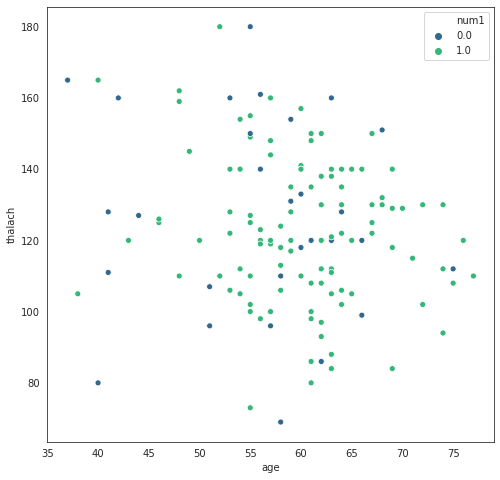

In [86]:
scatter('age', 'thalach')

Here the relation isn't clear

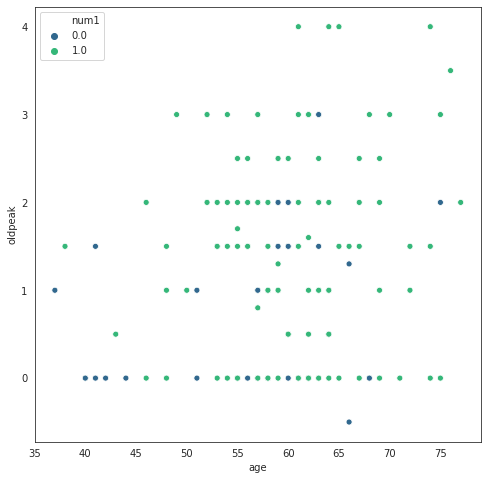

In [87]:
scatter('age', 'oldpeak')

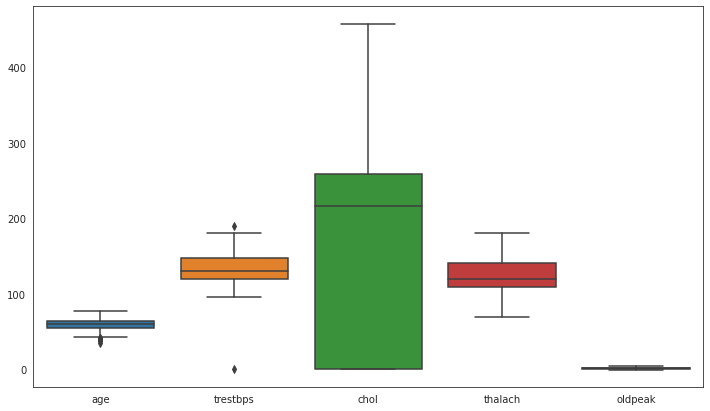

In [88]:
plt.figure().set_size_inches(12,7)
sns.boxplot(data = num)

There are only a few outliers in the dataset, we can remove them easily

In [89]:
df.drop('num', axis =1, inplace = True)

In [90]:
#Null Values

In [91]:
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps     56
chol          7
sex           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
num1          0
dtype: int64

In [92]:
#Imputing with mean
mean = df['trestbps'].mean()
df["trestbps"].fillna(mean, inplace = True)

In [93]:
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps      0
chol          7
sex           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
num1          0
dtype: int64

In [94]:
mean = df["chol"].mean()
df['chol'].fillna(mean,inplace = True)

In [95]:
df.groupby('sex')['sex'].count()

sex
0.0    125
1.0     68
Name: sex, dtype: int64

Thus we will fill al the Null values in 'fbs' with 0

In [96]:
df['sex'].fillna(0, inplace = True)

In [97]:
df.groupby('thalach')['thalach'].count().sort_values(ascending = False).head(5)

thalach
120.0    12
140.0    12
110.0     8
112.0     6
130.0     6
Name: thalach, dtype: int64

In [98]:
from random import choice
impute = [120.0,140.0,110.0, 112.0,130.0]
def random_imputer(row):
    if np.isnan(row['thalach']):
        row['thalach'] = choice(impute)
    return row
df = df.apply(random_imputer, axis = 1)
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps      0
chol          0
sex           0
restecg       0
thalach       0
exang        53
oldpeak      56
slope       102
thal        166
num1          0
dtype: int64

In [99]:
df.groupby('thalach')['thalach'].count().sort_values(ascending = False).head(5)

thalach
140.0    24
120.0    22
112.0    19
110.0    16
130.0    16
Name: thalach, dtype: int64

In [100]:
df.groupby('exang')['exang'].count()

exang
0.0    52
1.0    95
Name: exang, dtype: int64

There is not much of imbalance, so once again randomly inserting 0.0 and 1.0 into the column

In [101]:
from random import choice
impute = [0.0,1.0]
def random_imputer(row):
    if np.isnan(row['exang']):
        row['exang'] = choice(impute)
    return row
df = df.apply(random_imputer, axis = 1)
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps      0
chol          0
sex           0
restecg       0
thalach       0
exang         0
oldpeak      56
slope       102
thal        166
num1          0
dtype: int64

In [102]:
df.groupby('exang')['exang'].count()

exang
0.0     84
1.0    116
Name: exang, dtype: int64

In [103]:
df.groupby('oldpeak')['oldpeak'].count().sort_values(ascending = False)

oldpeak
 0.0    40
 2.0    25
 1.5    21
 1.0    18
 3.0    13
 2.5     9
 0.5     7
 4.0     4
 1.3     2
 3.5     1
 1.7     1
 1.6     1
 0.8     1
-0.5     1
Name: oldpeak, dtype: int64

In [104]:
from random import choice
impute = [0.0,2.0,1.5,1.0,3.0]
def random_imputer(row):
    if np.isnan(row['oldpeak']):
        row['oldpeak'] = choice(impute)
    return row
df = df.apply(random_imputer, axis = 1)
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps      0
chol          0
sex           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       102
thal        166
num1          0
dtype: int64

In [105]:
df.groupby('oldpeak')['oldpeak'].count().sort_values(ascending = False)

oldpeak
 0.0    47
 2.0    36
 1.0    36
 1.5    29
 3.0    25
 2.5     9
 0.5     7
 4.0     4
 1.3     2
 3.5     1
 1.7     1
 1.6     1
 0.8     1
-0.5     1
Name: oldpeak, dtype: int64

In [106]:
df.groupby('slope')['slope'].count()

slope
1.0    16
2.0    53
3.0    29
Name: slope, dtype: int64

In [107]:
from random import choice
impute = [1.0, 2.0, 3.0]
def random_imputer(row):
    global impute
    if np.isnan(row['slope']):
        row['slope'] = choice(impute)
    return row
df = df.apply(random_imputer, axis = 1)
df.isnull().sum()

age           0
fbs           0
cp            0
trestbps      0
chol          0
sex           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal        166
num1          0
dtype: int64

In [108]:
df.groupby('slope')['slope'].count()

slope
1.0    53
2.0    88
3.0    59
Name: slope, dtype: int64

In [109]:
166/200

0.83

In 'thal', more than 80% data is missing, so it will be logical to drop that column

In [110]:
df.drop('thal', axis = 1, inplace = True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   fbs       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   sex       200 non-null    float64
 6   restecg   200 non-null    float64
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    float64
 11  num1      200 non-null    float64
dtypes: float64(12)
memory usage: 18.9 KB


In [235]:
#One Hot Encoding

The following columns are Nominal Categorical:

    Sex = 
    CP = Chest pain
    fbs = Sugar Level, if sugar level>120mg/dl: 1 = yes, 0 = no
    restecg = Resting ECG level: 0 = Normal, 1 = ST-T wave abnormal, 2 = Left Ventrical Hypertrophy
    slope = Slope of ECG during exercise: 1 = Upsloping, 2 = Flat, 3 = Downsloping
    thal = defect: 3 = Normal, 6 = Fixed defect, 7 = Reversivble defect
    exang = exercise induced angina : 1 = yes; 0 = no 
    

In [112]:
def encode(column):
    global df
    print(df.shape)
    cols = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, cols], axis = 1)
    df.drop(column, axis =1, inplace = True)
    print(df.shape)

In [113]:
encode('sex')

(200, 12)
(200, 12)


In [114]:
encode('cp')

(200, 12)
(200, 14)


In [115]:
encode('fbs')

(200, 14)
(200, 14)


In [116]:
encode("restecg")

(200, 14)
(200, 15)


In [241]:
encode('slope')

(200, 15)
(200, 16)


In [117]:
encode('exang')

(200, 15)
(200, 15)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   trestbps  200 non-null    float64
 2   chol      200 non-null    float64
 3   thalach   200 non-null    float64
 4   oldpeak   200 non-null    float64
 5   slope     200 non-null    float64
 6   num1      200 non-null    float64
 7   1.0       200 non-null    uint8  
 8   2.0       200 non-null    uint8  
 9   3.0       200 non-null    uint8  
 10  4.0       200 non-null    uint8  
 11  1.0       200 non-null    uint8  
 12  1.0       200 non-null    uint8  
 13  2.0       200 non-null    uint8  
 14  1.0       200 non-null    uint8  
dtypes: float64(7), uint8(8)
memory usage: 12.6 KB


In [119]:
from sklearn.model_selection import train_test_split
X = df.drop('num1', axis = 1)
y = df['num1']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(max_depth = 2).fit(X_train_sc,y_train)
y_pred = dtc.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.7

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
confusion_matrix(y_test, y_pred)

array([[ 5, 12],
       [ 0, 33]])

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.29      0.45        17
         1.0       0.73      1.00      0.85        33

    accuracy                           0.76        50
   macro avg       0.87      0.65      0.65        50
weighted avg       0.82      0.76      0.71        50



Here the recall for Heart disease is 1.0, which seems to be ideal as we want to identify all the possible Heart Disease cases, even if some of the cases turn out to be False Positives

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3).fit(X_train_sc, y_train)
y_pred = rfc.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.68

In [146]:
confusion_matrix(y_test, y_pred)

array([[ 1, 16],
       [ 0, 33]])

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.11        17
         1.0       0.67      1.00      0.80        33

    accuracy                           0.68        50
   macro avg       0.84      0.53      0.46        50
weighted avg       0.78      0.68      0.57        50



Here too we find recall to be 1.0, but the precision seemsto be lower than decision trees

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000, class_weight = 'balanced').fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.74

In [165]:
confusion_matrix(y_test,y_pred)

array([[11,  6],
       [ 7, 26]])

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63        17
         1.0       0.81      0.79      0.80        33

    accuracy                           0.74        50
   macro avg       0.71      0.72      0.71        50
weighted avg       0.74      0.74      0.74        50



Here, recall is a bit lower, but precision is better than Tree based models. Still, Decision Trees seem to be giving better results

In [155]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf').fit(X_train_sc, y_train)
y_pred_rbf = svc_rbf.predict(X_test_sc)
print(accuracy_score(y_test,y_pred_rbf))
svc_lin = SVC(kernel = 'linear').fit(X_train_sc, y_train)
y_pred_lin = svc_lin.predict(X_test_sc)
print(accuracy_score(y_test,y_pred_lin))

0.68
0.72


In [156]:
confusion_matrix(y_test,y_pred)

array([[ 6, 11],
       [ 2, 31]])

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.35      0.48        17
         1.0       0.74      0.94      0.83        33

    accuracy                           0.74        50
   macro avg       0.74      0.65      0.65        50
weighted avg       0.74      0.74      0.71        50



Results are similar to Logistic Regression

In [133]:
max_acc = 0
k = 0
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,50,2):
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_train_sc,y_train)
    y_pred = knc.predict(X_test_sc)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy: k = {}  =  {}".format(i,accuracy))
    if accuracy>max_acc:
        max_acc = accuracy
        k = i
print("Max acuracy is {} for n_neighbors = {} ".format(max_acc, k))

Accuracy: k = 1  =  0.64
Accuracy: k = 3  =  0.72
Accuracy: k = 5  =  0.76
Accuracy: k = 7  =  0.72
Accuracy: k = 9  =  0.7
Accuracy: k = 11  =  0.7
Accuracy: k = 13  =  0.7
Accuracy: k = 15  =  0.66
Accuracy: k = 17  =  0.66
Accuracy: k = 19  =  0.66
Accuracy: k = 21  =  0.66
Accuracy: k = 23  =  0.66
Accuracy: k = 25  =  0.66
Accuracy: k = 27  =  0.66
Accuracy: k = 29  =  0.66
Accuracy: k = 31  =  0.66
Accuracy: k = 33  =  0.66
Accuracy: k = 35  =  0.66
Accuracy: k = 37  =  0.66
Accuracy: k = 39  =  0.66
Accuracy: k = 41  =  0.66
Accuracy: k = 43  =  0.66
Accuracy: k = 45  =  0.66
Accuracy: k = 47  =  0.66
Accuracy: k = 49  =  0.66
Max acuracy is 0.76 for n_neighbors = 5 


In [158]:
knc = KNeighborsClassifier(n_neighbors = 5).fit(X_train_sc,y_train)
y_pred = knc.predict(X_test_sc)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.76

In [159]:
confusion_matrix(y_test,y_pred)

array([[ 5, 12],
       [ 0, 33]])

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.29      0.45        17
         1.0       0.73      1.00      0.85        33

    accuracy                           0.76        50
   macro avg       0.87      0.65      0.65        50
weighted avg       0.82      0.76      0.71        50



In [161]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(max_depth = 2)
ada = AdaBoostClassifier(base_estimator = dtc, n_estimators = 1000, learning_rate = 1).fit(X_train_sc,y_train)
y_pred = ada.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.7

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.29      0.40        17
         1.0       0.71      0.91      0.80        33

    accuracy                           0.70        50
   macro avg       0.67      0.60      0.60        50
weighted avg       0.68      0.70      0.66        50



This model is not performing well.

In [253]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(max_depth = 2)
bc = BaggingClassifier(base_estimator = dt,
                      n_estimators = 1000,
                      n_jobs = 2,
                      bootstrap = True,
                      bootstrap_features = False).fit(X_train_sc, y_train)
y_pred = bc.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.7

In [167]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('DT', DecisionTreeClassifier(max_depth = 2)))
estimator.append(('SVC', SVC(kernel = 'rbf')))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors = 13)))
                 
vc = VotingClassifier(estimators= estimator, voting='hard').fit(X_train_sc,y_train)
y_pred= vc.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.7

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21        17
         1.0       0.69      1.00      0.81        33

    accuracy                           0.70        50
   macro avg       0.84      0.56      0.51        50
weighted avg       0.79      0.70      0.61        50



In [255]:
df.groupby("num1")['num1'].count()

num1
0.0     51
1.0    149
Name: num1, dtype: int64

In [256]:
from sklearn.metrics import confusion_matrix
knc = KNeighborsClassifier(n_neighbors = 7).fit(X_train_sc,y_train)
y_pred = knc.predict(X_test_sc)
confusion_matrix(y_test,y_pred)

array([[ 3, 13],
       [ 1, 33]])

In [170]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)
lr = LogisticRegression()
param_grid = {'max_iter' : [1000,2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear', 'sag']}

lr_clf = GridSearchCV(lr, param_grid = param_grid, scoring = scorer, cv = 5, verbose = True, n_jobs = -1)
best_lr_clf = lr_clf.fit(X_train_sc,y_train)
print('Best Score: ' + str(best_lr_clf.best_score_))
print('Best Parameters: ' + str(best_lr_clf.best_params_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.5s


Best Score: 0.8824084350721421
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.3s finished


In [171]:
lr_tuned = LogisticRegression(C =  0.23357214690901212, max_iter = 1000, penalty = 'l2', solver = 'liblinear').fit(X_train_sc,y_train)
y_pred = lr_tuned.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.29      0.42        17
         1.0       0.72      0.94      0.82        33

    accuracy                           0.72        50
   macro avg       0.72      0.62      0.62        50
weighted avg       0.72      0.72      0.68        50



So two  models seem to be giving good results:
    
    1. DecisionTreeClassifier: Gives recall of 1.0, which is great for predicting heart diseases, and a precision for predicting healthy heart seems to be 1.0, which means no patient who has a heart disease, is being assigned healthy status
    
    2. KNN Classifier with k = 5: Gives recall of 1.0, and precision of predicting class 0 is 1.0.
    
I recommend we combine both these classifier in Voting Classifer which gives me recall of 1.0 for the target class with 69% precision.